<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/EEG_Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
This is the project of Big Data and Machine Learning. This paper is about Electroencephalogram (EEG)-based emotion recognition. The code is proposed to do these procedure in sequnce.


1.   Data Preparation. Doing this to know what the SEED-IV is like.
2.   SVM classification. This model is easy, at least we can get the passed mark.
3.   CNN classificaiton. This modle is hard, we can do it if time allows.
4.   K Means. We are curious what if we use non labeled network?
4.   Other morden networks. This is hard because we need to find the mordern and special networks. I do not think this is plausible.
## Abbreviations
PSD: Power Spectral Density.

PCA: Principal Component Analysis.

PSD: Power Spectral Density.

DE: Differential Entropy.

LDS: linear dynamical system.




# Data Preparation
This will show how the data is.







## File overview by heirachy
1.   **eeg_feature_smooth**. The smooth data of EGG.
Including three sessions, each session has 15 subjects, each subject has two groups consists of DE & PSD feature extract method, each group has two filter group consists of LDS & moving average filters, each filter group has 24 labled variables, each variable has information about 62 electrodes, several time windows, 5 frequency bands.
2.   **eeg_raw_data**. Raw EGG data which has 1000 Hz sampling rate using the ESI NeuroScan System.
3.   **eye_feature_smooth**. The smooth data of eye. The top features are same as eeg_feature_smooth, but the each variable consists of 12 features and several time windows.
4.   **eye_raw_data**. Raw eye data which captured by SMI ETG eye-tracking glasses.
5.   **Channel Order.xlsx**. The EGG electrod name and order in eeg_feature_smooth & eeg_raw_data.
6.   **channel_62_pos**. The 62 EGG channels on the head location. The specific data and head location map does not show.
7.   **ReadMe.txt**. Introduction of the dataset, including copyright, sample gender, label, reference and contact information.
8.   **SEED-IV_stimulation.xlsx**. The video stimulation of the people, which contains video clip of three experiments.
9.   **SEED-IV_subject_info.txt**. The subject gengder, including nine female and six male.

In the Machine learning, this paper will only use eeg_feature_smooth, eye_feature_smooth, ReadMe.txt, Channel Order.xlsx as my input data. Other data in SEED_IV are kinds of middle data that do be used in this paper.

The data is not huge and might currently the author is skeptical about the training result. Fistly, show the EGG and eye data into figures for initial analyze.

As the origin paper says, DE extraction and LDS filter has the best performance. So, this paper tackles with DE feature extraction with LDS filter first. Original paper says they use T7, T8, FT7, FT8, TP7,and TP8, which index in mat are 24, 32, 15, 23, 33, and 41.

In [1]:
# remove all variables
rm(list = ls())
# optional, free memory
gc()
# Install
if(!require(R.matlab)) install.packages("R.matlab")
if(!require(googledrive)) install.packages("googledrive")
if(!require(devtools)) install.packages("devtools")
if(!require(e1071)) install.packages("e1071")


# Library / Link
library(R.matlab)
library(googledrive)
library(devtools)
library(e1071)


#Initialization
drive_auth()


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657438,35.2,1454451,77.7,1397159,74.7
Vcells,1221180,9.4,8388608,64.0,1975128,15.1


Loading required package: R.matlab

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.matlab’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’


Loading required package: googledrive

Loading required package: devtools

Loading required package: usethis

Loading required package: e1071

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘e1071’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Is it OK to cache OAuth access credentials in the folder ~/.cac

Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=7ce27daabfd02b90d6e8191e772bfe60&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWIzMmo5M1IySFloVTNvSkN3UHZ2RkpoMGd4VVpScldaMmwwcGozblR1eDYxdVVvdDlnU29JNktSRndZTzVzb3VqZFJ6QSIsInN0YXRlIjoiN2NlMjdkYWFiZmQwMmI5MGQ2ZTgxOTFlNzcyYmZlNjAifQ==


## Plot the file for better understanding


### Plot one person's data.

[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 4   
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• 1_20160518.mat



[1] "Before names"


[1] "de.movingAve1"   "de.LDS1"         "psd.movingAve1"  "psd.LDS1"       
 [5] "de.movingAve2"   "de.LDS2"         "psd.movingAve2"  "psd.LDS2"       
 [9] "de.movingAve3"   "de.LDS3"         "psd.movingAve3"  "psd.LDS3"       
[13] "de.movingAve4"   "de.LDS4"         "psd.movingAve4"  "psd.LDS4"       
[17] "de.movingAve5"   "de.LDS5"         "psd.movingAve5"  "psd.LDS5"       
[21] "de.movingAve6"   "de.LDS6"         "psd.movingAve6"  "psd.LDS6"       
[25] "de.movingAve7"   "de.LDS7"         "psd.movingAve7"  "psd.LDS7"       
[29] "de.movingAve8"   "de.LDS8"         "psd.movingAve8"  "psd.LDS8"       
[33] "de.movingAve9"   "de.LDS9"         "psd.movingAve9"  "psd.LDS9"       
[37] "de.movingAve10"  "de.LDS10"        "psd.movingAve10" "psd.LDS10"      
[41] "de.movingAve11"  "de.LDS11"        "psd.movingAve11" "psd.LDS11"      
[45] "de.movingAve12"  "de.LDS12"        "psd.movingAve12" "psd.LDS12"      
[49] "de.movingAve13"  "de.LDS13"        "psd.movingAve13" "psd.LDS13"      
[53] "de.movingAve14"  "de.LDS14"        "psd.movingAve14" "psd.LDS14"      
[57] "de.movingAve15"  "de.LDS15"        "psd.movingAve15" "psd.LDS15"      
[61] "de.movingAve16"  "de.LDS16"        "psd.movingAve16" "psd.LDS16"      
[65] "de.movingAve17"  "de.LDS17"        "psd.movingAve17" "psd.LDS17"      
[69] "de.movingAve18"  "de.LDS18"        "psd.movingAve18" "psd.LDS18"      
[73] "de.movingAve19"  "de.LDS19"        "psd.movingAve19" "psd.LDS19"      
[77] "de.movingAve20"  "de.LDS20"        "psd.movingAve20" "psd.LDS20"      
[81] "de.movingAve21"  "de.LDS21"        "psd.movingAve21" "psd.LDS21"      
[85] "de.movingAve22"  "de.LDS22"        "psd.movingAve22" "psd.LDS22"      
[89] "de.movingAve23"  "de.LDS23"        "psd.movingAve23" "psd.LDS23"      
[93] "de.movingAve24"  "de.LDS24"        "psd.movingAve24" "psd.LDS24"

[1] "After names"
          [,1]     [,2]     [,3]     [,4]     [,5]
 [1,] 25.80807 23.18175 22.40944 21.10645 18.91765
 [2,] 25.80882 23.18238 22.40955 21.10644 18.91731
 [3,] 25.80877 23.18234 22.41035 21.10671 18.91671
 [4,] 25.80916 23.18194 22.41150 21.10716 18.91632
 [5,] 25.80911 23.18055 22.41201 21.10801 18.91650
 [6,] 25.80886 23.17989 22.41204 21.10864 18.91666
 [7,] 25.80654 23.17933 22.41190 21.10955 18.91703
 [8,] 25.80432 23.17923 22.41226 21.11045 18.91703
 [9,] 25.80157 23.17917 22.41304 21.11217 18.91672
[10,] 25.79912 23.17885 22.41353 21.11325 18.91612
[11,] 25.79780 23.17900 22.41283 21.11338 18.91576
[12,] 25.79707 23.17857 22.41139 21.11351 18.91565
[13,] 25.79524 23.17765 22.40912 21.11288 18.91571
[14,] 25.79188 23.17641 22.40601 21.11206 18.91607
[15,] 25.78727 23.17494 22.40279 21.11140 18.91660
[16,] 25.78135 23.17280 22.39947 21.11071 18.91771
[17,] 25.77439 23.17109 22.39550 21.11048 18.91868
[18,] 25.76779 23.16972 22.39122 21.11043 18.91994
[19,] 25.7607

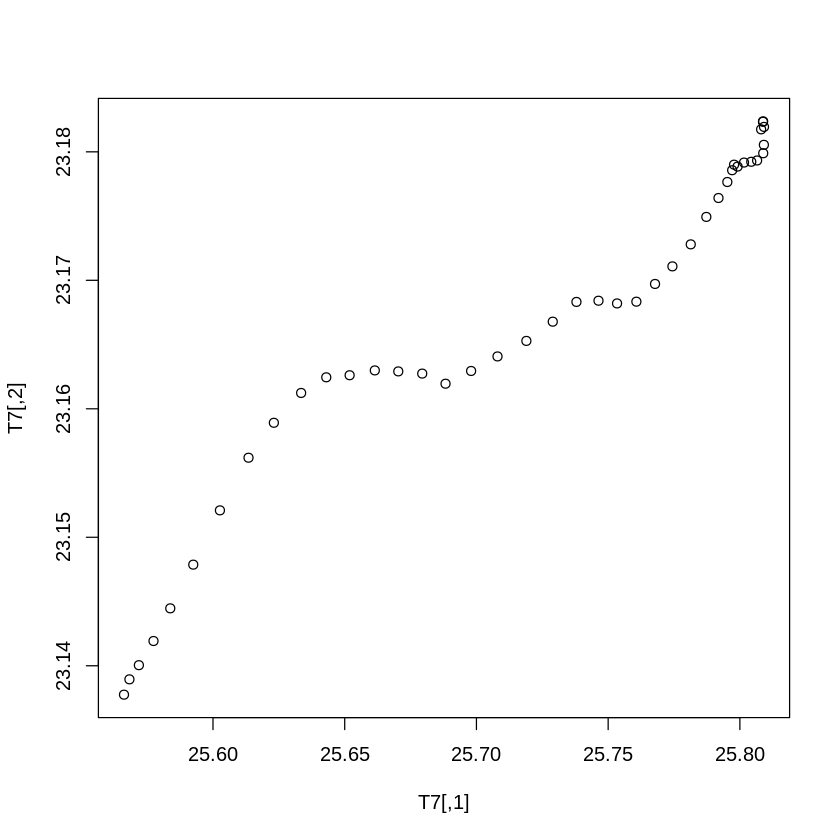

[1] "a"
 [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
 [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
[17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
[25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
[1] "subject1"
  [1] 26.17831 26.17799 26.17820 26.17819 26.17766 26.17907 26.18145 26.18400
  [9] 26.18700 26.18895 26.18949 26.19001 26.19095 26.19121 26.19057 26.19062
 [17] 26.19058 26.19080 26.18976 26.18732 26.18433 26.18228 26.18099 26.17962
 [25] 26.17753 26.17668 26.17585 26.17294 26.17122 26.17060 26.17029 26.17143
 [33] 25.80807 25.80882 25.80877 25.80916 25.80911 25.80886 25.80654 25.80432
 [41] 25.80157 25.79912 25.79780 25.79707 25.79524 25.79188 25.78727 25.78135
 [49] 25.77439 25.76779 25.76071 25.75338 25.74633 25.73796 25.72897 25.71895
 [57] 25.70800 25.69798 25.68827 25.67942 25.67033 25.66143 25.65187 25.64300
 [65] 25.63346 25.62311 25.61348 25.60263 25.

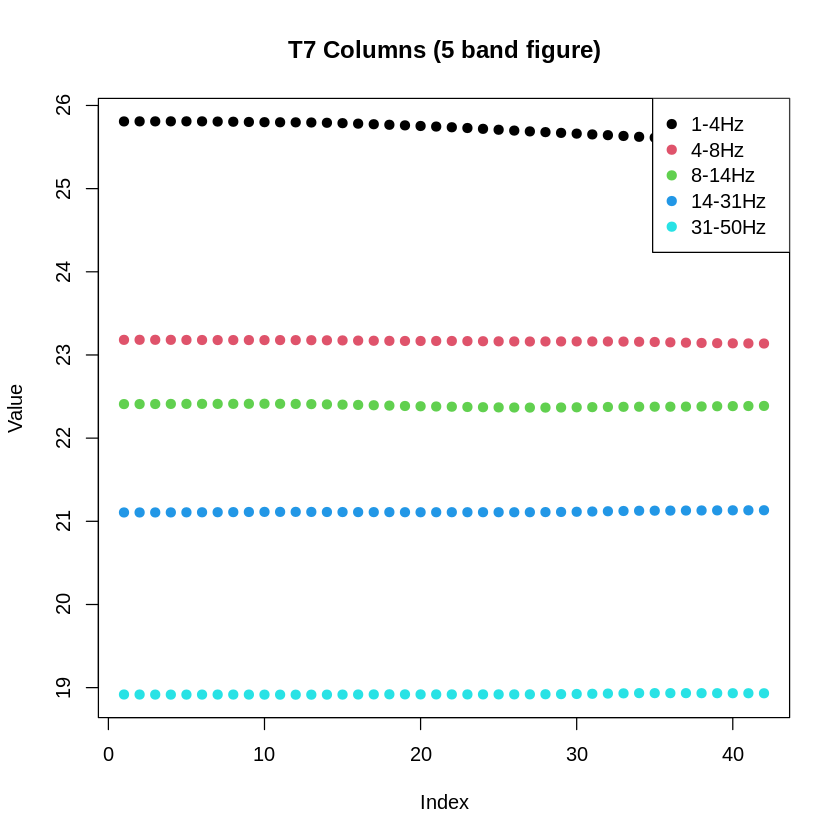

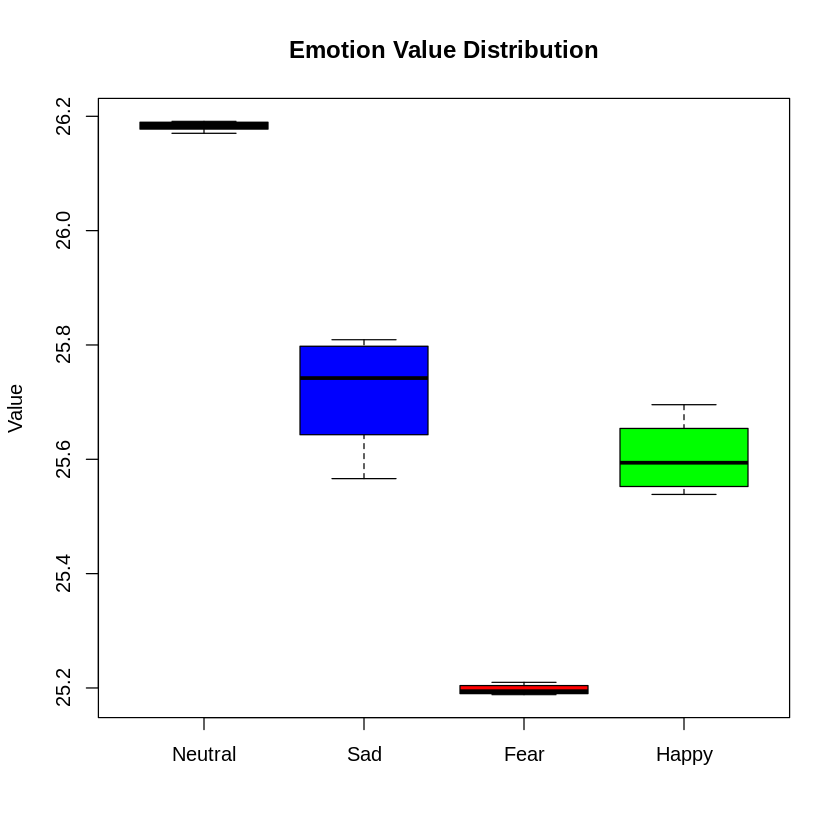

In [24]:
## I want to read and show EGG & eye data. To see how it is?


# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
sample <- readMat("1_20160518.mat")

print("Before names")
names(sample)
print("After names")


de_LDS1 <- sample$de.LDS1
T7 <- de_LDS1[24, , ]
print(T7)
plot(T7)

matplot(T7, pch = 19, col = 1:5,
        main = "T7 Columns (5 band figure)",
        xlab = "Index", ylab = "Value")
legend("topright", legend = c("1-4Hz", "4-8Hz", "8-14Hz", "14-31Hz","31-50Hz"),
       col = 1:5, pch = 19)

a = sample$de.LDS4[24, , 1]
# a = as.vector(a)
print("a")
print(a)

# session1_label = [1,2,3,0 ...], let us see differenct emotions in T7 delta band.
subject1 = c(sample$de.LDS4[24, , 1], sample$de.LDS1[24, , 1], sample$de.LDS2[24, , 1], sample$de.LDS3[24, , 1])
print("subject1")
print(subject1)
neutral = sample$de.LDS4[24, , 1]
sad = sample$de.LDS1[24, , 1]
fear = sample$de.LDS2[24, , 1]
happy = sample$de.LDS3[24, , 1]

# Well, the emotions are distinguishable.
boxplot(neutral, sad, fear, happy,
        names = c("Neutral", "Sad", "Fear", "Happy"),
        main = "Emotion Value Distribution",
        ylab = "Value",
        col = c("black", "blue", "red", "green"))

# Now ,



## All Data Combine and View


# SVM Model

## Introduction of SVM


In [23]:
## Small size SVM test

## Declaration
session1_label <- c(1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3)
session2_label <- c(2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1)
session3_label <- c(1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0);

FT7_order <- 15L
FT8_order <- 23L
T7_order <- 24L
T8_order <- 32L
TP7_order <- 33L
TP8_order <- 41L

delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5

times_order <-2

# Read mat file
EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
print(EGG_sample_file_path_name)
# Find the file in my Google Drive and see it
EGG_sample_file <- drive_get(EGG_sample_file_path_name)
head(EGG_sample_file)
drive_download(EGG_sample_file, path = "egg_1_20160518.mat", overwrite = TRUE)
sample <- readMat("egg_1_20160518.mat")

de_LDS1 <- sample$de.LDS1

      print("Before Head")

    #   head(de_LDS)
      head(de_LDS1)

      print("After Head")

# Arrange the data
neutral = sample$de.LDS4[24, , 1]
sad = sample$de.LDS1[24, , 1]
fear = sample$de.LDS2[24, , 1]
happy = sample$de.LDS3[24, , 1]

# "Neutral", "Sad", "Fear", "Happy"
FT7 <- sample$de.LDS4[FT7_order, , ]
FT8 <- sample$de.LDS4[FT8_order, , ]
T7 <- sample$de.LDS4[T7_order, , ]
T8 <- sample$de.LDS4[T8_order, , ]
TP7 <- sample$de.LDS4[TP7_order, , ]
TP8 <- sample$de.LDS4[TP8_order, , ]
emotion <- rep("Neutral", dim(sample$de.LDS4)[times_order])

FT7 <- rbind(FT7, sample$de.LDS1[FT7_order, , ])
FT8 <- rbind(FT8, sample$de.LDS1[FT8_order, , ])
T7 <- rbind(T7, sample$de.LDS1[T7_order, , ])
T8 <- rbind(T8, sample$de.LDS1[T8_order, , ])
TP7 <- rbind(TP7, sample$de.LDS1[TP7_order, , ])
TP8 <- rbind(TP8, sample$de.LDS1[TP8_order, , ])
newEmotion <- rep("Sad", dim(sample$de.LDS1)[times_order])
emotion <- c(emotion, newEmotion)

emotion <- factor(emotion)
colnames(FT7) <- c("FT7_delta", "FT7_theta", "FT7_alpha", "FT7_beta", "FT7_gamma")

egg_data <- data.frame(
  FT7, FT8, T7, T8, TP7, TP8, emotion
)

print("FT7 Test")
class(FT7)
typeof(FT7)
str(FT7)

head(egg_data)

set.seed(123)

# Get number of rows
n <- nrow(egg_data)
# Random sample of 80% row indices
train_index <- sample(1:n, size = 0.8 * n)
# Split data
train_data <- egg_data[train_index, ]
test_data  <- egg_data[-train_index, ]

print("train_data")
head(train_data)
print("test_data")
head(test_data)


# Train SVM
svm_model <- svm(emotion ~ ., data = train_data, kernel = "radial")
pred <- predict(svm_model, newdata = test_data)

# Confusion matrix
table(Predicted = pred, Actual = test_data$emotion)

# Simple accuracy
mean(pred == test_data$emotion)


[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.



name          
1 1_20160518.mat
  path                                                              
1 ~/Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat
  id                                drive_resource                   
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1r64a1aynHlpqQyhkNh6w1dYVUVQOmpUv
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>        <NA>       <NA> <NA>                 <NA>                  
1 yangfei nie drive#user TRUE 14809535534033574514 nieyangfeigo@gmail.com
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>             <NA>           <NA>   <NA>   <NA>  <NA>            
1 drive#permission anyoneWithLink anyone writer FALSE drive#permission
  <NA>                 <NA> <NA>                   <NA>  <NA>       
1 14809535534033574514 user nieyangfeigo@gmail.com owner yangfei nie
  <NA>                                                                                            
1 https://lh3.googleusercontent.com/a/ACg8ocJKMO1KUsmmRkU5K0lfR9AuJOtYT3vo-EQNpzcsI4D7yQmHsrCZ=s64
  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA> 
1 FALSE FALSE drive FALSE FALSE FALSE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE
  <NA> <NA> <NA> <NA>  <NA> <NA> <NA> <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> 
1 TRUE TRUE TRUE FALSE TRUE TRUE TRUE TRUE FALSE FALSE TRUE TRUE TRUE FALSE
  <NA> <NA>  <NA>  <NA> <NA> <NA> <NA> <NA> <NA>           <NA>                
1 TRUE FALSE FALSE TRUE TRUE TRUE TRUE TRUE anyoneWithLink 14809535534033574514
  <NA>  <NA> <NA>  <NA>  <NA>  <NA>  <NA>      
1 FALSE TRUE FALSE FALSE FALSE FALSE drive#file
  <NA>                              <NA>           <NA>                    
1 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ 1_20160518.mat application/octet-stream
  <NA>  <NA>  <NA>  <NA>
1 FALSE FALSE FALSE 4   
  <NA>                                                                            
1 https://drive.google.com/uc?id=1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ&export=download
  <NA>                                                                               
1 https://drive.google.com/file/d/1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ/view?usp=drivesdk
  <NA>                                                                           
1 https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream
  <NA>  <NA> <NA> <NA>                     <NA>                    
1 FALSE 0    TRUE 2025-10-17T21:46:09.595Z 2025-10-17T21:46:09.595Z
  <NA>                     <NA>                     <NA> <NA> <NA> <NA> <NA> 
1 2018-11-15T15:04:54.000Z 2018-11-15T15:04:54.000Z TRUE TRUE TRUE TRUE FALSE
  <NA> <NA>           <NA> <NA> <NA>                            
1 TRUE 1_20160518.mat mat  mat  7861e59e376101c225e5d2cc72898d89
  <NA>                                    
1 e8d98a4cf5e108a7f5760a3faa903bba12446e8d
  <NA>                                                             <NA>   
1 0c65161c6b064276c855b1774e8a21d0e9ecf1162d1202a7c89dad9c30b19b70 7786107
  <NA>    <NA>                                                <NA>  <NA> 
1 7786107 0B1AUM7oqgWhbcW5XU0UyTEVUbnQ5aEpMR0ROYUorSEpvWmhJPQ FALSE FALSE

File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• egg_1_20160518.mat



[1] "Before Head"


, , 1

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 27.79550 27.79682 27.79767 27.79741 27.79553 27.79228 27.78719 27.78052
[2,] 27.70755 27.70907 27.71068 27.71103 27.70982 27.70718 27.70236 27.69550
[3,] 27.70877 27.71046 27.71320 27.71450 27.71437 27.71310 27.70942 27.70360
[4,] 25.76244 25.76344 25.76375 25.76396 25.76326 25.76159 25.75878 25.75566
[5,] 26.43668 26.43803 26.44081 26.44251 26.44298 26.44244 26.43996 26.43564
[6,] 26.87120 26.87218 26.87210 26.87251 26.87195 26.87040 26.86726 26.86483
         [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
[1,] 27.77573 27.76967 27.76152 27.75401 27.74830 27.74257 27.73615 27.72878
[2,] 27.69071 27.68471 27.67632 27.66828 27.66243 27.65674 27.65046 27.64311
[3,] 27.69966 27.69454 27.68693 27.67948 27.67346 27.66743 27.66058 27.65233
[4,] 25.75384 25.75157 25.74785 25.74452 25.74150 25.73809 25.73425 25.72963
[5,] 26.43259 26.42882 26.42284 26.41710 26.41264 26.40855 26.40400 26.39819
[6,] 26.86250 26.86012 26.85788 26.85665 26.85474 26.85151 26.84698 26.84077
        [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]
[1,] 27.72024 27.71008 27.70036 27.68967 27.67815 27.66619 27.65250 27.63645
[2,] 27.63422 27.62415 27.61442 27.60384 27.59233 27.58080 27.56735 27.55151
[3,] 27.64248 27.63196 27.62145 27.61018 27.59809 27.58627 27.57248 27.55642
[4,] 25.72497 25.71969 25.71412 25.70761 25.70080 25.69337 25.68499 25.67481
[5,] 26.39099 26.38375 26.37610 26.36808 26.35957 26.35150 26.34191 26.33039
[6,] 26.83408 26.82635 26.81761 26.80811 26.79901 26.78879 26.77770 26.76497
        [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]
[1,] 27.62201 27.60763 27.59161 27.57508 27.55725 27.53901 27.52257 27.50916
[2,] 27.53730 27.52304 27.50709 27.49060 27.47259 27.45423 27.43789 27.42394
[3,] 27.54171 27.52684 27.51032 27.49315 27.47417 27.45500 27.43755 27.42202
[4,] 25.66533 25.65667 25.64764 25.63834 25.62822 25.61789 25.60821 25.60090
[5,] 26.31982 26.30944 26.29801 26.28643 26.27330 26.26014 26.24791 26.23748
[6,] 26.75260 26.74174 26.73031 26.71945 26.70787 26.69655 26.68439 26.67399
        [,33]    [,34]    [,35]    [,36]    [,37]    [,38]    [,39]    [,40]
[1,] 27.49529 27.47977 27.46330 27.44740 27.43238 27.42025 27.41139 27.40503
[2,] 27.40963 27.39329 27.37586 27.36018 27.34482 27.33245 27.32326 27.31622
[3,] 27.40638 27.38847 27.36920 27.35256 27.33599 27.32277 27.31284 27.30497
[4,] 25.59231 25.58237 25.57178 25.56109 25.55096 25.54279 25.53690 25.53189
[5,] 26.22650 26.21324 26.19888 26.18678 26.17470 26.16540 26.15846 26.15256
[6,] 26.66288 26.65145 26.63911 26.62516 26.61269 26.60149 26.59324 26.58638
        [,41]    [,42]
[1,] 27.40214 27.39959
[2,] 27.31267 27.30946
[3,] 27.30062 27.29665
[4,] 25.52938 25.52748
[5,] 26.14928 26.14653
[6,] 26.58271 26.58010

, , 2

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 25.00744 25.00843 25.00932 25.00939 25.00810 25.00679 25.00361 24.99897
[2,] 24.93556 24.93651 24.93778 24.93812 24.93700 24.93588 24.93269 24.92751
[3,] 24.93300 24.93400 24.93570 24.93628 24.93554 24.93501 24.93230 24.92740
[4,] 23.28503 23.28553 23.28573 23.28610 23.28569 23.28516 23.28405 23.28267
[5,] 23.93959 23.94014 23.94125 23.94178 23.94139 23.94086 23.93871 23.93477
[6,] 23.97060 23.97120 23.97099 23.97087 23.96983 23.96923 23.96801 23.96825
         [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
[1,] 24.99552 24.99164 24.98658 24.98182 24.97803 24.97398 24.96991 24.96487
[2,] 24.92354 24.91883 24.91274 24.90695 24.90213 24.89695 24.89164 24.88546
[3,] 24.92386 24.91950 24.91381 24.90836 24.90373 24.89859 24.89304 24.88677
[4,] 23.28154 23.28062 23.27979 23.27866 23.27766 23.27676 23.27555 23.27371
[5,] 23.93218 23.92938 23.92571 23.92197 23.91852 23.91465 23.91049 23.90583
[6,] 23.96878 23.96961 23.97104 23.97193 23.97252 23.97239 23.97171 23.97020
        [,17]    [,18]    [,19]    [,20]    [,21]  

[1] "After Head"
[1] "FT7 Test"


[1] "matrix" "array"

[1] "double"

 num [1:74, 1:5] 26.2 26.2 26.2 26.2 26.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:5] "FT7_delta" "FT7_theta" "FT7_alpha" "FT7_beta" ...


,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,X1,X2,X3,X4,X5,⋯,X2.3,X3.3,X4.3,X5.3,X1.4,X2.4,X3.4,X4.4,X5.4,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,26.22747,23.53655,22.40434,21.05027,19.08881,26.54908,23.73661,22.34250,21.12510,19.09370,⋯,23.10836,22.23103,20.93053,18.60912,25.21314,23.18945,22.26031,21.17230,18.77244,Neutral
2,26.22714,23.53658,22.40539,21.05024,19.08925,26.54859,23.73593,22.34222,21.12467,19.09356,⋯,23.10788,22.23174,20.93040,18.60943,25.21288,23.18899,22.26001,21.17192,18.77263,Neutral
3,26.22734,23.53688,22.40711,21.05026,19.09002,26.54956,23.73614,22.34196,21.12428,19.09408,⋯,23.10792,22.23302,20.93036,18.60985,25.21188,23.18954,22.25969,21.17110,18.77303,Neutral
4,26.22733,23.53714,22.40806,21.05057,19.09128,26.54967,23.73592,22.34133,21.12479,19.09470,⋯,23.10786,22.23365,20.93017,18.61032,25.21126,23.18992,22.25912,21.17061,18.77331,Neutral
5,26.22677,23.53631,22.40813,21.05108,19.09304,26.54956,23.73489,22.34054,21.12525,19.09591,⋯,23.10685,22.23364,20.92979,18.61111,25.21028,23.19035,22.25788,21.16994,18.77350,Neutral
6,26.22817,23.53548,22.40817,21.05206,19.09448,26.54888,23.73447,22.33982,21.12630,19.09688,⋯,23.10568,22.23360,20.92978,18.61186,25.20878,23.19057,22.25685,21.16974,18.77401,Neutral


[1] "train_data"


,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,X1,X2,X3,X4,X5,⋯,X2.3,X3.3,X4.3,X5.3,X1.4,X2.4,X3.4,X4.4,X5.4,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
31,26.21998,23.51389,22.36877,21.02276,19.05513,26.52410,23.75124,22.34086,21.12983,19.11607,⋯,23.08498,22.22459,20.92545,18.62151,25.17852,23.20017,22.25861,21.15722,18.78426,Neutral
51,25.78749,23.19079,22.39272,21.11095,18.93378,26.16991,23.50738,22.40371,21.00698,18.97379,⋯,22.96879,22.36485,21.04606,18.44048,25.16627,23.21608,22.40869,21.10673,18.66338,Sad
14,26.24067,23.53220,22.39490,21.04619,19.08536,26.55180,23.74569,22.34027,21.13029,19.10181,⋯,23.09543,22.22739,20.92513,18.60917,25.20010,23.19932,22.24797,21.16504,18.77343,Neutral
67,25.63991,23.17641,22.38411,21.13059,18.94644,26.03829,23.47738,22.38633,21.02347,18.96682,⋯,22.98636,22.35472,21.05882,18.45919,25.12009,23.23112,22.41820,21.14553,18.67840,Sad
42,25.82542,23.19975,22.42006,21.11480,18.92997,26.21712,23.53128,22.41434,21.00970,18.98207,⋯,22.98012,22.38812,21.05807,18.43755,25.17420,23.22120,22.41633,21.10297,18.66431,Sad
50,25.79459,23.19213,22.39733,21.11193,18.93454,26.17980,23.51137,22.40619,21.00751,18.97465,⋯,22.96881,22.36852,21.04748,18.43987,25.16994,23.21667,22.40987,21.10615,18.66291,Sad


[1] "test_data"


,FT7_delta,FT7_theta,FT7_alpha,FT7_beta,FT7_gamma,X1,X2,X3,X4,X5,⋯,X2.3,X3.3,X4.3,X5.3,X1.4,X2.4,X3.4,X4.4,X5.4,emotion
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,26.22714,23.53658,22.40539,21.05024,19.08925,26.54859,23.73593,22.34222,21.12467,19.09356,⋯,23.10788,22.23174,20.93040,18.60943,25.21288,23.18899,22.26001,21.17192,18.77263,Neutral
3,26.22734,23.53688,22.40711,21.05026,19.09002,26.54956,23.73614,22.34196,21.12428,19.09408,⋯,23.10792,22.23302,20.93036,18.60985,25.21188,23.18954,22.25969,21.17110,18.77303,Neutral
4,26.22733,23.53714,22.40806,21.05057,19.09128,26.54967,23.73592,22.34133,21.12479,19.09470,⋯,23.10786,22.23365,20.93017,18.61032,25.21126,23.18992,22.25912,21.17061,18.77331,Neutral
20,26.23710,23.52867,22.38162,21.03676,19.06544,26.54325,23.74590,22.33724,21.13211,19.10430,⋯,23.09151,22.22657,20.92420,18.60865,25.18813,23.20095,22.24439,21.16364,18.77460,Neutral
30,26.22032,23.51439,22.36887,21.02335,19.05556,26.52500,23.74995,22.34132,21.13076,19.11727,⋯,23.08463,22.22494,20.92545,18.62131,25.17957,23.19934,22.25856,21.15800,18.78496,Neutral
33,25.83411,23.20206,22.41607,21.10823,18.93196,26.23362,23.53272,22.40448,21.00848,18.98542,⋯,22.99043,22.37945,21.05097,18.43610,25.18639,23.21480,22.40857,21.09992,18.66472,Sad


         Actual
Predicted Neutral Sad
  Neutral       5   0
  Sad           0  10

[1] 1

In [33]:
## EGG variables read OK. I suggest make trial 2 and try in small batch. When OK, then go to big bach and SVM.





## Declaration
# Session number
session_number <- 2
# Subject number
subject_number <- 2
# Trial number
trial_number <- 2
# Session file name. Well, there should be a beautiful regulation expression to tackle with the file name. I choose the hard coding file name method.
# The files are not so much anyway.
session1_file <- c("1_20160518.mat","2_20150915.mat","3_20150919.mat","4_20151111.mat","5_20160406.mat","6_20150507.mat","7_20150715.mat","8_20151103.mat","9_20151028.mat","10_20151014.mat","11_20150916.mat","12_20150725.mat","13_20151115.mat","14_20151205.mat","15_20150508.mat")
session2_file <- c("1_20161125.mat","2_20150920.mat","3_20151018.mat","4_20151118.mat","5_20160413.mat","6_20150511.mat","7_20150717.mat","8_20151110.mat","9_20151119.mat","10_20151021.mat","11_20150921.mat","12_20150804.mat","13_20151125.mat","14_20151208.mat","15_20150514.mat")
session3_file <- c("1_20161126.mat","2_20151012.mat","3_20151101.mat","4_20151123.mat","5_20160420.mat","6_20150512.mat","7_20150721.mat","8_20151117.mat","9_20151209.mat","10_20151023.mat","11_20151011.mat","12_20150807.mat","13_20161130.mat","14_20151215.mat","15_20150527.mat")
session_file <- matrix(
  c(session1_file, session2_file, session3_file),
  nrow = session_number,
  ncol = subject_number,
  byrow = TRUE
)
# Session label
session1_label <- c(1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3)
session2_label <- c(2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1)
session3_label <- c(1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0)
session_label <- c(session1_label, session2_label, session3_label)
session_label <- matrix(
  c(session1_label, session2_label, session3_label),
  nrow = session_number,
  ncol = trial_number,
  byrow = TRUE
)
# Directory
root_path <- "Project_EGG_Big_Data/SEED_IV"
egg_path <- paste0(root_path, "/eeg_feature_smooth")
eye_path <- paste0(root_path, "/eye_feature_smooth")
# Six Electrode index
FT7_order <- 15L
FT8_order <- 23L
T7_order <- 24L
T8_order <- 32L
TP7_order <- 33L
TP8_order <- 41L
# Frequency index
delta_order <- 1
theta_order <- 2
alpha_order <- 3
beta_order <- 4
gamma_order <- 5
# time order, because DE split each trial to lots of 4 seconds. I should know how many 4 seconds.
times_order <-2

FT7 <- matrix(0, nrow = 0, ncol = 5)
FT8 <- matrix(0, nrow = 0, ncol = 5)
T7 <- matrix(0, nrow = 0, ncol = 5)
T8 <- matrix(0, nrow = 0, ncol = 5)
TP7 <- matrix(0, nrow = 0, ncol = 5)
TP8 <- matrix(0, nrow = 0, ncol = 5)
eye <- matrix(0, nrow = 0, ncol = 5)
emotion <- rep("Neutral", dim(sample$de.LDS4)[times_order])




for(session_index in 1:session_number)
{

      ######################################################
  # # Read mat file
  # EGG_sample_file_path_name <- "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
  # print(EGG_sample_file_path_name)
  # # Find the file in my Google Drive and see it
  # EGG_sample_file <- drive_get(EGG_sample_file_path_name)
  # head(EGG_sample_file)
  # drive_download(EGG_sample_file, path = "1_20160518.mat", overwrite = TRUE)
  # sample <- readMat("1_20160518.mat")

  # print("Before names")
  # print(names(sample))
  # print("After names")
  ######################################################

  egg_session_path =  paste0(egg_path, "/", session_index)
  eye_session_path =  paste0(eye_path, "/", session_index)

  for(subject_index in 1:subject_number){
    egg_file_path_name <- paste0(egg_session_path, "/", session_file[session_index, subject_index])
    print(egg_file_path_name)
    eye_file_path_name <- paste0(eye_session_path, "/", session_file[session_index, subject_index])
    print(eye_file_path_name)


    # Error: It seems the file did not be get.



    # Find the file in my Google Drive and see it
    egg_file_Google_drive <- drive_get(egg_file_path_name)
    eye_file_Google_drive <- drive_get(eye_file_path_name)
    # Use local name because there are some names that are same. So, to avoid overwrite each other.
    print(egg_file_Google_drive)

    egg_file_name_local = paste0("egg_", egg_file_Google_drive$name)
    eye_file_name_local = paste0("eye_", eye_file_Google_drive$name)
    drive_download(egg_file_Google_drive, path = egg_file_name_local, overwrite = TRUE)
    # drive_download(eye_file_Google_drive, path = paste0("eye_", eye_file_Google_drive$name), overwrite = TRUE)

    egg_file_local <- readMat(egg_file_name_local)
    # eye_file_local <- readMat(eye_file_name_local)





    for(trial_index in 1:trial_number){

      de_LDS <- egg_file_local[[paste0("de.LDS", trial_index)]]
    #   eye_data <- eye_file_local[[paste0("eye_", trial_index)]]

      print("egg_file_local")
      print(names(egg_file_local))

      print("de_LDS")
      print(de_LDS)



      print("FT7")
      print(FT7)

      FT7 <- rbind(FT7, de_LDS[FT7_order, , ])
      FT8 <- rbind(FT8, de_LDS[FT8_order, , ])
      T7 <- rbind(T7, de_LDS[T7_order, , ])
      T8 <- rbind(T8, de_LDS[T8_order, , ])
      TP7 <- rbind(TP7, de_LDS[TP7_order, , ])
      TP8 <- rbind(TP8, de_LDS[TP8_order, , ])
    #   eye <- rbind(eye, eye_data)


      emotion <- c(emotion, rep(session_label[session_index][trial_index], dim(de_LDS)[times_order]))
    }



  }


}

  emotion <- factor(emotion)
  colnames(FT7) <- c("FT7_delta", "FT7_theta", "FT7_alpha", "FT7_beta", "FT7_gamma")
  egg_data <- data.frame(
    FT7, FT8, T7, T8, TP7, TP8, eye, emotion
  )







# # Get number of rows
# n <- nrow(egg_data)
# # Random sample of 80% row indices
# train_index <- sample(1:n, size = 0.8 * n)
# # Split data
# train_data <- egg_data[train_index, ]
# test_data  <- egg_data[-train_index, ]

# print("train_data")
# head(train_data)
# print("test_data")
# head(test_data)


# # Train SVM
# svm_model <- svm(emotion ~ ., data = train_data, kernel = "radial")
# pred <- predict(svm_model, newdata = test_data)

# # Confusion matrix
# table(Predicted = pred, Actual = test_data$emotion)

# # Simple accuracy
# mean(pred == test_data$emotion)


Warning message in matrix(c(session1_file, session2_file, session3_file), nrow = session_number, :
“data length [45] is not a sub-multiple or multiple of the number of rows [2]”
Warning message in matrix(c(session1_label, session2_label, session3_label), nrow = session_number, :
“data length differs from size of matrix: [72 != 2 x 2]”


[1] "Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/1/1_20160518.mat"
[1] "Project_EGG_Big_Data/SEED_IV/eye_feature_smooth/1/1_20160518.mat"


✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



# A dribble: 1 × 4
  name           path                                    id       drive_resource
  <chr>          <chr>                                   <drv_id> <list>        
1 1_20160518.mat ~/Project_EGG_Big_Data/SEED_IV/eeg_fea… 1yQ7zov… <named list>  


File downloaded:

• 1_20160518.mat <id: 1yQ7zovei2PJzekEaBA0X1Omv3WH-ApVZ>

Saved locally as:

• egg_1_20160518.mat



[1] "egg_file_local"
 [1] "de.movingAve1"   "de.LDS1"         "psd.movingAve1"  "psd.LDS1"       
 [5] "de.movingAve2"   "de.LDS2"         "psd.movingAve2"  "psd.LDS2"       
 [9] "de.movingAve3"   "de.LDS3"         "psd.movingAve3"  "psd.LDS3"       
[13] "de.movingAve4"   "de.LDS4"         "psd.movingAve4"  "psd.LDS4"       
[17] "de.movingAve5"   "de.LDS5"         "psd.movingAve5"  "psd.LDS5"       
[21] "de.movingAve6"   "de.LDS6"         "psd.movingAve6"  "psd.LDS6"       
[25] "de.movingAve7"   "de.LDS7"         "psd.movingAve7"  "psd.LDS7"       
[29] "de.movingAve8"   "de.LDS8"         "psd.movingAve8"  "psd.LDS8"       
[33] "de.movingAve9"   "de.LDS9"         "psd.movingAve9"  "psd.LDS9"       
[37] "de.movingAve10"  "de.LDS10"        "psd.movingAve10" "psd.LDS10"      
[41] "de.movingAve11"  "de.LDS11"        "psd.movingAve11" "psd.LDS11"      
[45] "de.movingAve12"  "de.LDS12"        "psd.movingAve12" "psd.LDS12"      
[49] "de.movingAve13"  "de.LDS13"        "psd.movingAve

✔ The input `path` resolved to exactly 1 file.

✔ The input `path` resolved to exactly 1 file.



# A dribble: 1 × 4
  name           path                                    id       drive_resource
  <chr>          <chr>                                   <drv_id> <list>        
1 2_20150915.mat ~/Project_EGG_Big_Data/SEED_IV/eeg_fea… 1_bsVe_… <named list>  


File downloaded:

• 2_20150915.mat <id: 1_bsVe_EleIcI_e1RnMkHkBUCxaojBQWB>

Saved locally as:

• egg_2_20150915.mat



[1] "egg_file_local"
 [1] "de.movingAve1"   "de.LDS1"         "psd.movingAve1"  "psd.LDS1"       
 [5] "de.movingAve2"   "de.LDS2"         "psd.movingAve2"  "psd.LDS2"       
 [9] "de.movingAve3"   "de.LDS3"         "psd.movingAve3"  "psd.LDS3"       
[13] "de.movingAve4"   "de.LDS4"         "psd.movingAve4"  "psd.LDS4"       
[17] "de.movingAve5"   "de.LDS5"         "psd.movingAve5"  "psd.LDS5"       
[21] "de.movingAve6"   "de.LDS6"         "psd.movingAve6"  "psd.LDS6"       
[25] "de.movingAve7"   "de.LDS7"         "psd.movingAve7"  "psd.LDS7"       
[29] "de.movingAve8"   "de.LDS8"         "psd.movingAve8"  "psd.LDS8"       
[33] "de.movingAve9"   "de.LDS9"         "psd.movingAve9"  "psd.LDS9"       
[37] "de.movingAve10"  "de.LDS10"        "psd.movingAve10" "psd.LDS10"      
[41] "de.movingAve11"  "de.LDS11"        "psd.movingAve11" "psd.LDS11"      
[45] "de.movingAve12"  "de.LDS12"        "psd.movingAve12" "psd.LDS12"      
[49] "de.movingAve13"  "de.LDS13"        "psd.movingAve

! Problem with 1 path: no file has such a canonical path

  Project_EGG_Big_Data/SEED_IV/eeg_feature_smooth/2/3_20150919.mat

! No path resolved to exactly 1 file.

! Problem with 1 path: no file has such a canonical path

  Project_EGG_Big_Data/SEED_IV/eye_feature_smooth/2/3_20150919.mat

! No path resolved to exactly 1 file.



# A dribble: 0 × 4
# ℹ 4 variables: name <chr>, path <chr>, id <drv_id>, drive_resource <list>


ERROR: [1m[33mError[39m in `confirm_single_file()`:[22m
[1m[22m[33m![39m `file` does not identify at least one Drive file.
